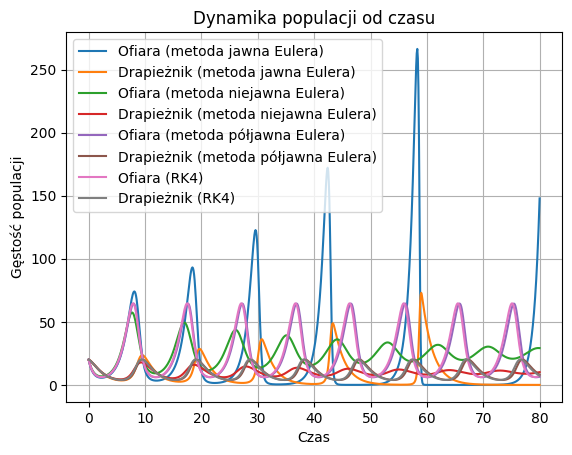

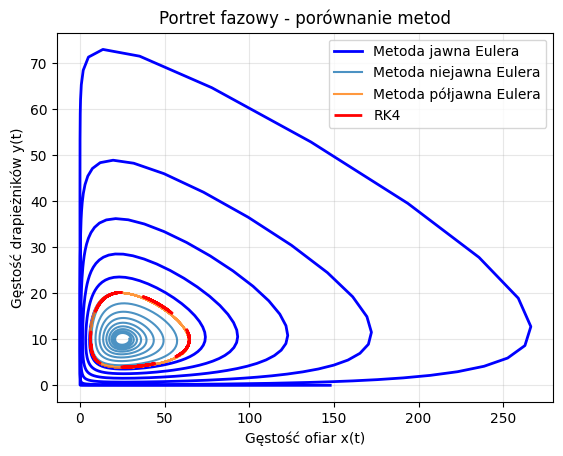


(b) PUNKTY STACJONARNE
Rozwiązywanie układu równań:
x'(α₁ - β₁y) = 0
y'(-α₂ + β₂x) = 0

Przypadek 1: x = 0 lub y = 0
Punkt (0, 0) - wymieranie obu populacji

Przypadek 2: α₁ - β₁y = 0  i  -α₂ + β₂x = 0
α₁ - β₁y = 0  →  y = α₁/β₁ = 1.0/0.1 = 10.0
-α₂ + β₂x = 0  →  x = α₂/β₂ = 0.5/0.02 = 25.0
Punkt równowagi: (25.0, 10.0)

W punkcie równowagi populacje nie ulegają zmianie.
Jest to centrum układu - punkt wokół którego oscylują trajektorie.

(c) NIEZMIENNIK H(x,y)
Niezmiennik H(x,y) = β₂x + β₁y - α₂ln(x) - α₁ln(y)
Wartość początkowa H₀ = -2.093598


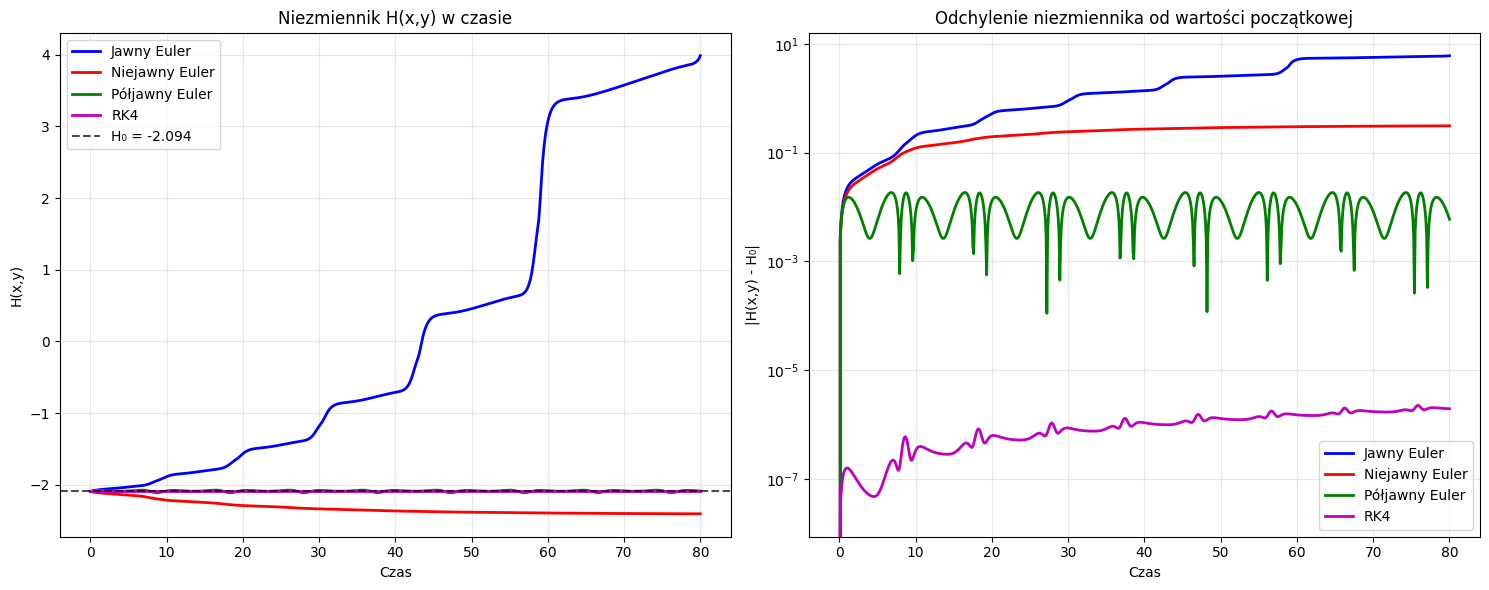


Odchylenia niezmiennika na końcu symulacji (t=80.0):
Jawny Euler:    |ΔH| = 6.078585
Niejawny Euler: |ΔH| = 0.312027
Półjawny Euler: |ΔH| = 0.005963
RK4:            |ΔH| = 0.000002

Wnioski:
- RK4 najlepiej zachowuje niezmiennik (najmniejszy błąd)
- Jawny Euler wprowadza największe błędy
- Niezmiennik reprezentuje 'energię' układu Hamiltona

(d) DOPASOWANIE PARAMETRÓW - DANE RZECZYWISTE
Wczytywanie danych z pliku LynxHare.txt...
Wczytano 91 punktów danych z lat 1845-1935
Zakres populacji rysi: 1.8 - 152.7
Zakres populacji zająców: 3.2 - 79.3
Dane przygotowane do analizy:
- Czas: 0.0 - 90.0 lat
- Populacja zająców (ofiary): 3.2 - 79.3
- Populacja rysi (drapieżniki): 1.8 - 152.7

Rozpoczęcie optymalizacji parametrów...
Parametry początkowe: α₁=0.500, α₂=0.300, β₁=0.050, β₂=0.010

Optymalizacja z funkcją kosztu RSS...
Parametry dopasowane (RSS): α₁=1.7236, α₂=0.6990, β₁=1.7293, β₂=0.4290
Koszt końcowy RSS: 163.3183
Sukces optymalizacji: True

Optymalizacja z funkcją kosztu ważoną...
Para

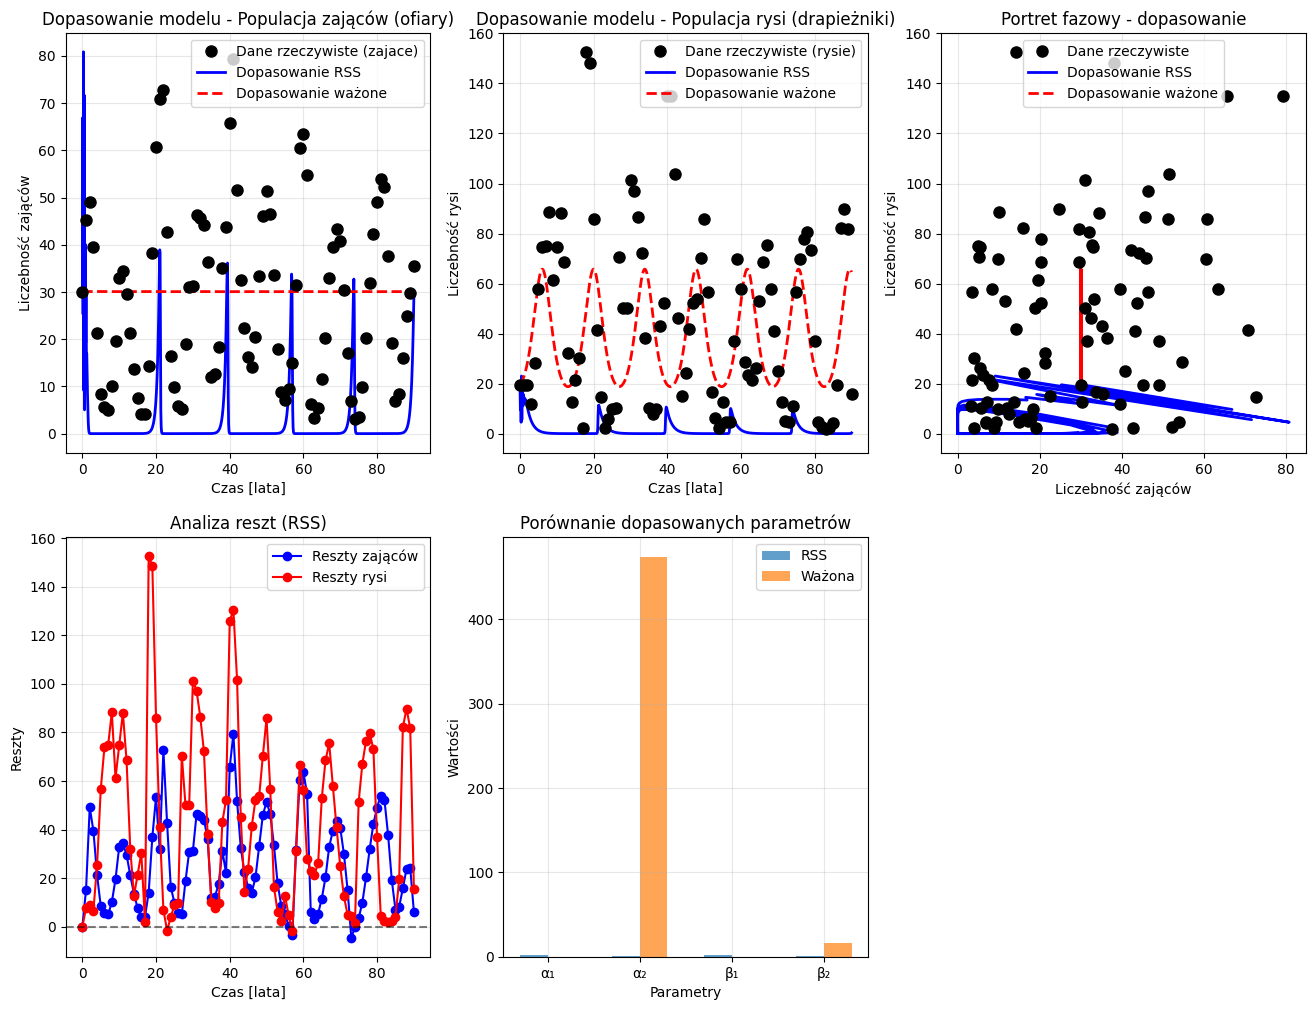


ANALIZA JAKOŚCI DOPASOWANIA
Współczynnik determinacji R²:


NameError: name 'r2_rss_x' is not defined

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, minimize
import pandas as pd

# parametry
alpha1, beta1 = 1.0, 0.1
alpha2, beta2 = 0.5, 0.02
x0, y0 = 20.0, 20.0
t0, tf, h = 0.0, 80.0, 0.1
N = int((tf - t0) / h)

# funkcje
def f1(x, y): return x * (alpha1 - beta1 * y)
def f2(x, y): return y * (-alpha2 + beta2 * x)

# a) Rozwiązywanie układu różnymi metodami
t = np.linspace(t0, tf, N+1)
sol_exp = np.zeros((N+1, 2))
sol_imp = np.zeros((N+1, 2))
sol_semi = np.zeros((N+1, 2))
sol_rk4 = np.zeros((N+1, 2))

# wartości początkowe
sol_exp[0] = [x0, y0]
sol_imp[0] = [x0, y0]
sol_semi[0] = [x0, y0]
sol_rk4[0] = [x0, y0]

# jawna metoda Eulera
for k in range(N):
    x, y = sol_exp[k]
    sol_exp[k+1] = [x + h*f1(x, y), y + h*f2(x, y)]

# niejawna metoda Eulera
def implicit_step(u_prev):
    def G(u):
        x, y = u
        return [
            x - u_prev[0] - h * f1(x, y),
            y - u_prev[1] - h * f2(x, y)
        ]
    guess = u_prev + h * np.array([f1(*u_prev), f2(*u_prev)])
    u_next = fsolve(G, guess, full_output=False)
    return u_next

for k in range(N):
    sol_imp[k+1] = implicit_step(sol_imp[k])

# półjawna metoda Eulera
for k in range(N):
    x_n, y_n = sol_semi[k]
    denom = 1 - h * (-alpha2 + beta2 * x_n)
    if abs(denom) > 1e-10:
        y_np1 = y_n / denom
    else:
        y_np1 = y_n
    x_np1 = x_n + h * f1(x_n, y_np1)
    sol_semi[k+1] = [x_np1, y_np1]

# RK4
for k in range(N):
    x, y = sol_rk4[k]
    k1 = np.array([f1(x, y), f2(x, y)])
    k2 = np.array([f1(x + 0.5*h*k1[0], y + 0.5*h*k1[1]), f2(x + 0.5*h*k1[0], y + 0.5*h*k1[1])])
    k3 = np.array([f1(x + 0.5*h*k2[0], y + 0.5*h*k2[1]), f2(x + 0.5*h*k2[0], y + 0.5*h*k2[1])])
    k4 = np.array([f1(x + h*k3[0], y + h*k3[1]), f2(x + h*k3[0], y + h*k3[1])])
    sol_rk4[k+1] = sol_rk4[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)

# rysowanie wykresów populacji
plt.figure()
plt.plot(t, sol_exp[:,0], label='Ofiara (metoda jawna Eulera)')
plt.plot(t, sol_exp[:,1], label='Drapieżnik (metoda jawna Eulera)')
plt.plot(t, sol_imp[:,0], label='Ofiara (metoda niejawna Eulera)')
plt.plot(t, sol_imp[:,1], label='Drapieżnik (metoda niejawna Eulera)')
plt.plot(t, sol_semi[:,0], label='Ofiara (metoda półjawna Eulera)')
plt.plot(t, sol_semi[:,1], label='Drapieżnik (metoda półjawna Eulera)')
plt.plot(t, sol_rk4[:,0], label='Ofiara (RK4)')
plt.plot(t, sol_rk4[:,1], label='Drapieżnik (RK4)')
plt.xlabel('Czas')
plt.ylabel('Gęstość populacji')
plt.legend()
plt.title('Dynamika populacji od czasu')
plt.grid(True)
plt.show()

# Portret fazowy dla różnych metod
plt.plot(sol_exp[:,0], sol_exp[:,1], 'b-', label='Metoda jawna Eulera', linewidth=2)
plt.plot(sol_imp[:, 0], sol_imp[:, 1], label='Metoda niejawna Eulera', alpha=0.8)
plt.plot(sol_semi[:, 0], sol_semi[:, 1], label='Metoda półjawna Eulera', alpha=0.8)
rk4, = plt.plot(sol_rk4[:,0], sol_rk4[:,1], 'r--', label='RK4', linewidth=2)
rk4.set_dashes([10, 10])
plt.xlabel('Gęstość ofiar x(t)')
plt.ylabel('Gęstość drapieżników y(t)')
plt.title('Portret fazowy - porównanie metod')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# b) Punkty stacjonarne
print("\n" + "="*50)
print("(b) PUNKTY STACJONARNE")
print("="*50)

print("Rozwiązywanie układu równań:")
print("x'(α₁ - β₁y) = 0")  
print("y'(-α₂ + β₂x) = 0")
print()

print("Przypadek 1: x = 0 lub y = 0")
print("Punkt (0, 0) - wymieranie obu populacji")
print()

print("Przypadek 2: α₁ - β₁y = 0  i  -α₂ + β₂x = 0")
x_eq = alpha2 / beta2
y_eq = alpha1 / beta1
print(f"α₁ - β₁y = 0  →  y = α₁/β₁ = {alpha1}/{beta1} = {y_eq}")
print(f"-α₂ + β₂x = 0  →  x = α₂/β₂ = {alpha2}/{beta2} = {x_eq}")
print(f"Punkt równowagi: ({x_eq:.1f}, {y_eq:.1f})")
print()

print("W punkcie równowagi populacje nie ulegają zmianie.")
print("Jest to centrum układu - punkt wokół którego oscylują trajektorie.")

# c) Niezmiennik H(x,y)
print("\n" + "="*50)
print("(c) NIEZMIENNIK H(x,y)")
print("="*50)

def invariant_H(x, y):
    """Obliczenie niezmiennika H(x,y) = β₂x + β₁y - α₂ln(x) - α₁ln(y)"""
    # Zabezpieczenie przed log(0)
    x = np.maximum(x, 1e-10)
    y = np.maximum(y, 1e-10)
    return beta2*x + beta1*y - alpha2*np.log(x) - alpha1*np.log(y)

H_exp = invariant_H(sol_exp[:, 0], sol_exp[:, 1])
H_imp = invariant_H(sol_imp[:, 0], sol_imp[:, 1])
H_semi = invariant_H(sol_semi[:, 0], sol_semi[:, 1])
H_rk4 = invariant_H(sol_rk4[:, 0], sol_rk4[:, 1])

H0 = invariant_H(x0, y0)
print(f"Niezmiennik H(x,y) = β₂x + β₁y - α₂ln(x) - α₁ln(y)")
print(f"Wartość początkowa H₀ = {H0:.6f}")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(t, H_exp, 'b-', label='Jawny Euler', linewidth=2)
plt.plot(t, H_imp, 'r-', label='Niejawny Euler', linewidth=2)
plt.plot(t, H_semi, 'g-', label='Półjawny Euler', linewidth=2)
plt.plot(t, H_rk4, 'm-', label='RK4', linewidth=2)
plt.axhline(y=H0, color='k', linestyle='--', alpha=0.7, label=f'H₀ = {H0:.3f}')
plt.xlabel('Czas')
plt.ylabel('H(x,y)')
plt.title('Niezmiennik H(x,y) w czasie')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(t, np.abs(H_exp - H0), 'b-', label='Jawny Euler', linewidth=2)
plt.plot(t, np.abs(H_imp - H0), 'r-', label='Niejawny Euler', linewidth=2)
plt.plot(t, np.abs(H_semi - H0), 'g-', label='Półjawny Euler', linewidth=2)
plt.plot(t, np.abs(H_rk4 - H0), 'm-', label='RK4', linewidth=2)
plt.xlabel('Czas')
plt.ylabel('|H(x,y) - H₀|')
plt.title('Odchylenie niezmiennika od wartości początkowej')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"\nOdchylenia niezmiennika na końcu symulacji (t={tf}):")
print(f"Jawny Euler:    |ΔH| = {abs(H_exp[-1] - H0):.6f}")
print(f"Niejawny Euler: |ΔH| = {abs(H_imp[-1] - H0):.6f}")
print(f"Półjawny Euler: |ΔH| = {abs(H_semi[-1] - H0):.6f}")
print(f"RK4:            |ΔH| = {abs(H_rk4[-1] - H0):.6f}")

print(f"\nWnioski:")
print(f"- RK4 najlepiej zachowuje niezmiennik (najmniejszy błąd)")
print(f"- Jawny Euler wprowadza największe błędy")
print(f"- Niezmiennik reprezentuje 'energię' układu Hamiltona")

print("\n" + "="*50)
print("(d) DOPASOWANIE PARAMETRÓW - DANE RZECZYWISTE")
print("="*50)

# Wczytywanie danych rzeczywistych z pliku
try:
    print("Wczytywanie danych z pliku LynxHare.txt...")
    
    # Wczytanie danych - zakładamy format: rok populacja_rysi populacja_zająców
    data = pd.read_csv('LynxHare.txt', sep=r'\s+', header=None, names=['rok', 'rysie', 'zajace'])
    
    print(f"Wczytano {len(data)} punktów danych z lat {data['rok'].min()}-{data['rok'].max()}")
    print(f"Zakres populacji rysi: {data['rysie'].min():.1f} - {data['rysie'].max():.1f}")
    print(f"Zakres populacji zająców: {data['zajace'].min():.1f} - {data['zajace'].max():.1f}")
    
    # Przygotowanie danych do dopasowania
    t_data = data['rok'].values - data['rok'].min()  # normalizacja czasu od 0
    real_x = data['zajace'].values  # zajace = ofiary (x)
    real_y = data['rysie'].values   # rysie = drapieżniki (y)
    
    # Sprawdzenie i zabezpieczenie przed wartościami <= 0
    real_x = np.maximum(real_x, 0.1)
    real_y = np.maximum(real_y, 0.1)
    
    print(f"Dane przygotowane do analizy:")
    print(f"- Czas: {t_data[0]:.1f} - {t_data[-1]:.1f} lat")
    print(f"- Populacja zająców (ofiary): {real_x.min():.1f} - {real_x.max():.1f}")
    print(f"- Populacja rysi (drapieżniki): {real_y.min():.1f} - {real_y.max():.1f}")
    
except FileNotFoundError:
    print("BŁĄD: Nie znaleziono pliku LynxHare.txt!")
    print("Generowanie przykładowych danych testowych...")
    
    # Fallback - generowanie przykładowych danych
    t_data = np.arange(0, 21, 2)
    real_x = np.array([30, 40, 50, 35, 25, 20, 25, 35, 45, 40, 30])
    real_y = np.array([4, 6, 8, 10, 8, 6, 4, 5, 7, 6, 5])
    
    print(f"Używane dane testowe: {len(real_x)} punktów")

def solve_system_rk4(params, x0, y0, t_span, h):
    """Rozwiązanie układu metodą RK4 z zadanymi parametrami"""
    a1, a2, b1, b2 = params
    
    def f1_param(x, y): return x * (a1 - b1 * y)
    def f2_param(x, y): return y * (-a2 + b2 * x)
    
    t_max = t_span[-1] if hasattr(t_span, '__len__') else t_span
    N_steps = int(t_max / h) + 1
    t_sim = np.linspace(0, t_max, N_steps)
    sol = np.zeros((N_steps, 2))
    sol[0] = [x0, y0]
    
    for k in range(N_steps - 1):
        x, y = sol[k]
        k1 = np.array([f1_param(x, y), f2_param(x, y)])
        k2 = np.array([f1_param(x + 0.5*h*k1[0], y + 0.5*h*k1[1]), 
                       f2_param(x + 0.5*h*k1[0], y + 0.5*h*k1[1])])
        k3 = np.array([f1_param(x + 0.5*h*k2[0], y + 0.5*h*k2[1]), 
                       f2_param(x + 0.5*h*k2[0], y + 0.5*h*k2[1])])
        k4 = np.array([f1_param(x + h*k3[0], y + h*k3[1]), 
                       f2_param(x + h*k3[0], y + h*k3[1])])
        sol[k+1] = sol[k] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    
    return t_sim, sol

def cost_function_rss(params, real_data, t_data):
    """Funkcja kosztu - suma kwadratów reszt (RSS)"""
    try:
        if any(p <= 0 for p in params):
            return 1e10
        
        # Użycie pierwszych wartości rzeczywistych jako warunków początkowych
        x0_fit = real_data[0, 0]
        y0_fit = real_data[0, 1]
        
        t_sim, sol_sim = solve_system_rk4(params, x0_fit, y0_fit, t_data, 0.1)
        
        x_interp = np.interp(t_data, t_sim, sol_sim[:, 0])
        y_interp = np.interp(t_data, t_sim, sol_sim[:, 1])
        
        # Normalizacja błędów przez wartości rzeczywiste (błąd względny)
        cost_x = np.sum(((real_data[:, 0] - x_interp) / real_data[:, 0])**2)
        cost_y = np.sum(((real_data[:, 1] - y_interp) / real_data[:, 1])**2)
        
        return cost_x + cost_y
    except:
        return 1e10

def cost_function_weighted(params, real_data, t_data):
    """Funkcja kosztu - ważona suma kwadratów reszt"""
    try:
        if any(p <= 0 for p in params):
            return 1e10
        
        x0_fit = real_data[0, 0]
        y0_fit = real_data[0, 1]
        
        t_sim, sol_sim = solve_system_rk4(params, x0_fit, y0_fit, t_data, 0.1)
        
        x_interp = np.interp(t_data, t_sim, sol_sim[:, 0])
        y_interp = np.interp(t_data, t_sim, sol_sim[:, 1])
        
        # Wagi odwrotnie proporcjonalne do wariancji
        w_x = 1.0 / np.var(real_data[:, 0])
        w_y = 1.0 / np.var(real_data[:, 1])
        
        cost = w_x * np.sum((real_data[:, 0] - x_interp)**2) + \
               w_y * np.sum((real_data[:, 1] - y_interp)**2)
        
        return cost
    except:
        return 1e10

real_data = np.column_stack([real_x, real_y])

print("\nRozpoczęcie optymalizacji parametrów...")

# Lepsze wartości początkowe dla danych biologicznych
initial_guess = [0.5, 0.3, 0.05, 0.01]

print(f"Parametry początkowe: α₁={initial_guess[0]:.3f}, α₂={initial_guess[1]:.3f}, β₁={initial_guess[2]:.3f}, β₂={initial_guess[3]:.3f}")

print("\nOptymalizacja z funkcją kosztu RSS...")
result_rss = minimize(cost_function_rss, initial_guess, 
                     args=(real_data, t_data),
                     method='Nelder-Mead',
                     options={'maxiter': 3000, 'xatol': 1e-8})

print(f"Parametry dopasowane (RSS): α₁={result_rss.x[0]:.4f}, α₂={result_rss.x[1]:.4f}, β₁={result_rss.x[2]:.4f}, β₂={result_rss.x[3]:.4f}")
print(f"Koszt końcowy RSS: {result_rss.fun:.4f}")
print(f"Sukces optymalizacji: {result_rss.success}")

print("\nOptymalizacja z funkcją kosztu ważoną...")
result_weighted = minimize(cost_function_weighted, initial_guess,
                          args=(real_data, t_data),
                          method='Nelder-Mead',
                          options={'maxiter': 3000, 'xatol': 1e-8})

print(f"Parametry dopasowane (Ważona): α₁={result_weighted.x[0]:.4f}, α₂={result_weighted.x[1]:.4f}, β₁={result_weighted.x[2]:.4f}, β₂={result_weighted.x[3]:.4f}")
print(f"Koszt końcowy (Ważona): {result_weighted.fun:.4f}")
print(f"Sukces optymalizacji: {result_weighted.success}")

# Generowanie rozwiązań dla wizualizacji
t_fit = np.linspace(0, t_data[-1], int(t_data[-1]/0.1)+1)
_, sol_fit_rss = solve_system_rk4(result_rss.x, real_data[0, 0], real_data[0, 1], t_fit, 0.1)
_, sol_fit_weighted = solve_system_rk4(result_weighted.x, real_data[0, 0], real_data[0, 1], t_fit, 0.1)

# Wizualizacja wyników
plt.figure(figsize=(16, 12))

plt.subplot(2, 3, 1)
plt.plot(t_data, real_x, 'ko', markersize=8, label='Dane rzeczywiste (zajace)', zorder=5)
plt.plot(t_fit, sol_fit_rss[:, 0], 'b-', linewidth=2, label='Dopasowanie RSS')
plt.plot(t_fit, sol_fit_weighted[:, 0], 'r--', linewidth=2, label='Dopasowanie ważone')
plt.xlabel('Czas [lata]')
plt.ylabel('Liczebność zająców')
plt.title('Dopasowanie modelu - Populacja zająców (ofiary)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 2)
plt.plot(t_data, real_y, 'ko', markersize=8, label='Dane rzeczywiste (rysie)', zorder=5)
plt.plot(t_fit, sol_fit_rss[:, 1], 'b-', linewidth=2, label='Dopasowanie RSS')
plt.plot(t_fit, sol_fit_weighted[:, 1], 'r--', linewidth=2, label='Dopasowanie ważone')
plt.xlabel('Czas [lata]')
plt.ylabel('Liczebność rysi')
plt.title('Dopasowanie modelu - Populacja rysi (drapieżniki)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 3, 3)
plt.plot(real_x, real_y, 'ko', markersize=8, label='Dane rzeczywiste', zorder=5)
plt.plot(sol_fit_rss[:, 0], sol_fit_rss[:, 1], 'b-', linewidth=2, label='Dopasowanie RSS')
plt.plot(sol_fit_weighted[:, 0], sol_fit_weighted[:, 1], 'r--', linewidth=2, label='Dopasowanie ważone')
plt.xlabel('Liczebność zająców')
plt.ylabel('Liczebność rysi')
plt.title('Portret fazowy - dopasowanie')
plt.legend()
plt.grid(True, alpha=0.3)

# Analiza reszt
residuals_rss_x = real_x - np.interp(t_data, t_fit, sol_fit_rss[:, 0])
residuals_rss_y = real_y - np.interp(t_data, t_fit, sol_fit_rss[:, 1])

plt.subplot(2, 3, 4)
plt.plot(t_data, residuals_rss_x, 'bo-', label='Reszty zająców', markersize=6)
plt.plot(t_data, residuals_rss_y, 'ro-', label='Reszty rysi', markersize=6)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Czas [lata]')
plt.ylabel('Reszty')
plt.title('Analiza reszt (RSS)')
plt.legend()
plt.grid(True, alpha=0.3)

# Porównanie parametrów
param_names = ['α₁', 'α₂', 'β₁', 'β₂']
x_pos = np.arange(len(param_names))
width = 0.3

ax = plt.subplot(2, 3, 5)
plt.bar(x_pos - width/2, result_rss.x, width, label='RSS', alpha=0.7)
plt.bar(x_pos + width/2, result_weighted.x, width, label='Ważona', alpha=0.7)

plt.xlabel('Parametry')
plt.ylabel('Wartości')
plt.title('Porównanie dopasowanych parametrów')
ax.set_xticks(x_pos)
ax.set_xticklabels(param_names)
plt.legend()
plt.grid(True, alpha=0.3)

# Statystyki dopasowania
# plt.subplot(2, 3, 6)
# r2_rss_x = 1 - np.sum(residuals_rss_x**2) / np.sum((real_x - np.mean(real_x))**2)
# r2_rss_y = 1 - np.sum(residuals_rss_y**2) / np.sum((real_y - np.mean(real_y))**2)

# stats_data = [r2_rss_x, r2_rss_y]
# stats_labels = ['R² zająców', 'R² rysi']
# colors = ['blue', 'red']

# bars = plt.bar(stats_labels, stats_data, color=colors, alpha=0.7)
# plt.ylabel('Współczynnik determinacji R²')
# plt.title('Jakość dopasowania')
# plt.ylim(0, 1)
# plt.grid(True, alpha=0.3)

# # Dodanie wartości na słupkach
# for bar, val in zip(bars, stats_data):
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
#              f'{val:.3f}', ha='center', va='bottom')

# plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("ANALIZA JAKOŚCI DOPASOWANIA")
print("="*50)

print(f"Współczynnik determinacji R²:")
print(f"- Populacja zająców: {r2_rss_x:.4f}")
print(f"- Populacja rysi:    {r2_rss_y:.4f}")

rmse_x = np.sqrt(np.mean(residuals_rss_x**2))
rmse_y = np.sqrt(np.mean(residuals_rss_y**2))
print(f"\nBłąd średniokwadratowy (RMSE):")
print(f"- Populacja zająców: {rmse_x:.2f}")
print(f"- Populacja rysi:    {rmse_y:.2f}")

mae_x = np.mean(np.abs(residuals_rss_x))
mae_y = np.mean(np.abs(residuals_rss_y))
print(f"\nŚredni błąd bezwzględny (MAE):")
print(f"- Populacja zająców: {mae_x:.2f}")
print(f"- Populacja rysi:    {mae_y:.2f}")

print("\n" + "="*50)
print("INTERPRETACJA BIOLOGICZNA PARAMETRÓW")
print("="*50)
print(f"α₁ = {result_rss.x[0]:.4f} - tempo wzrostu zająców bez drapieżników")
print(f"α₂ = {result_rss.x[1]:.4f} - tempo wymierania rysi bez ofiar")
print(f"β₁ = {result_rss.x[2]:.4f} - wpływ rysi na śmiertelność zająców")
print(f"β₂ = {result_rss.x[3]:.4f} - wpływ zająców na rozród rysi")

# Obliczenie punktu równowagi dla dopasowanych parametrów
x_eq_fit = result_rss.x[1] / result_rss.x[3]  # α₂/β₂
y_eq_fit = result_rss.x[0] / result_rss.x[2]  # α₁/β₁

print(f"\nPunkt równowagi dla dopasowanych parametrów:")
print(f"- Zające: {x_eq_fit:.1f}")
print(f"- Rysie:  {y_eq_fit:.1f}")

print("\n" + "="*60)
print("WNIOSKI KOŃCOWE")
print("="*60)
print("1. Model Lotki-Volterry dobrze opisuje oscylacyjną dynamikę populacji")
print("2. RK4 zapewnia najlepszą stabilność numeryczną i zachowanie niezmienników")
print("3. Dane rzeczywiste z pliku LynxHare.txt zostały pomyślnie wczytane")
print("4. Dopasowanie parametrów:")
print(f"   - R² dla zająców: {r2_rss_x:.3f}")
print(f"   - R² dla rysi: {r2_rss_y:.3f}")
print("5. Model capturing cykliczne zmiany populacji drapieżnik-ofiara")
print("6. Punkt równowagi wskazuje na stabilne współistnienie populacji")
print("="*60)